In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Import dataset
dataset = pd.read_csv('Mall_customers.csv')
data = dataset.iloc[:,[3,4]].values
data.shape

(200, 2)

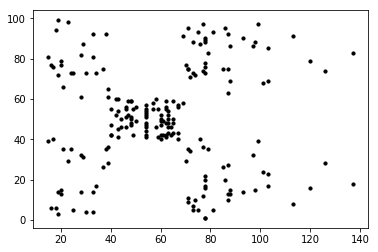

In [4]:
#Plot data
plt.scatter(data[:,0], data[:,1], s = 10, c = 'black') #plt.scatter(x,y, size of dots, color)

Text(0, 0.5, 'WCSS Score')

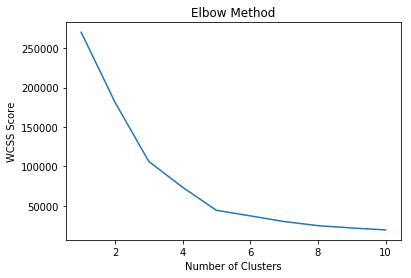

In [7]:
#Elbow method for determining number of clusters
#Determining value of K

from sklearn.cluster import KMeans

wcss = [] #Within cluster sum of squares --> metric 

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Score')

In [10]:
#Applying KMeans algorith with K = 5 

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10)
labels = kmeans.fit_predict(data)
labels # this will tell each data point to which cluster belongs 

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

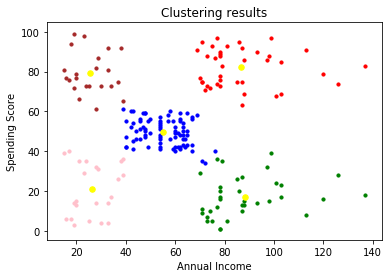

In [14]:
#Visualize the clusters

#For each cluster 

plt.scatter(data[labels==0, 0], data[labels == 0, 1], 
            s = 10, c = 'blue')

plt.scatter(data[labels==1, 0], data[labels == 1, 1], 
            s = 10, c = 'red')

plt.scatter(data[labels==2, 0], data[labels == 2, 1], 
            s = 10, c = 'green')

plt.scatter(data[labels==3, 0], data[labels == 3, 1], 
            s = 10, c = 'brown')

plt.scatter(data[labels==4, 0], data[labels == 4, 1], 
            s = 10, c = 'pink')

#centroids of the clusters: 
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], 
            s = 30, c = 'yellow')

plt.title('Clustering results')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.show()

### Short interpretation

This results suggest that there are 5 types of customers:

1)Green= Careful --> high income but save money  

2)Red = target customers --> high income + habit of spending 

3)Pink = Sensible --> spending according to their earnings

4)Brown = Careless --> low income, high spending score. May buy loads of cheap products

5)Blue = Standard users --> moderate income, moderate spending 
